In [1]:
from flexpart_management.notebooks.sulfate_volcano_chc.n02_regressors.n02_regressors_lfc import *

import \
    flexpart_management.notebooks.sulfate_volcano_chc.n02_regressors.n02_regressors_lfc as lfc

from flexpart_management.notebooks.sulfate_volcano_chc.n02_regressors.n02_regressors_lfc_1 import \
    get_source_fit
from sklearn.preprocessing import QuantileTransformer as QT

reload


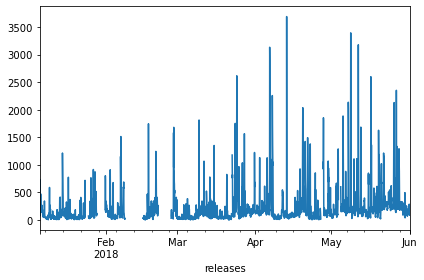

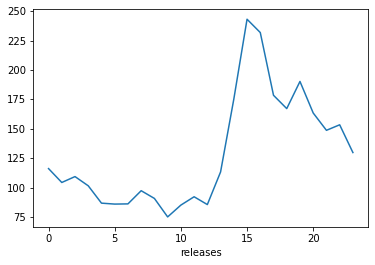

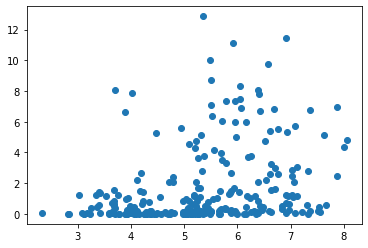

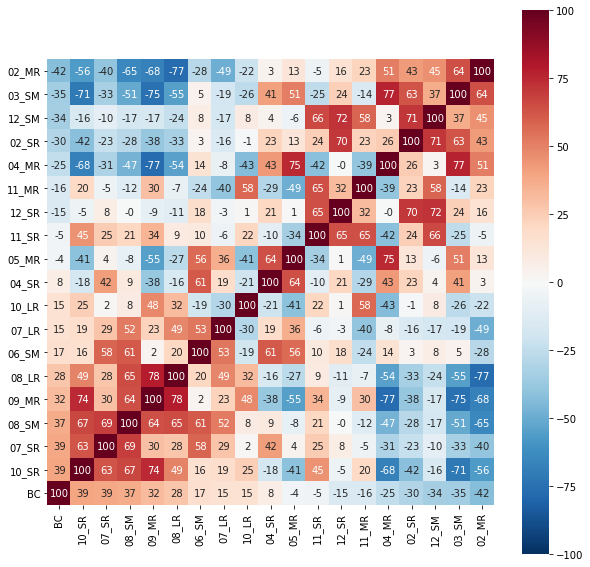

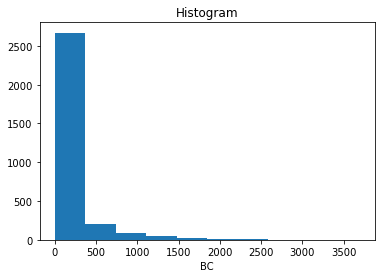

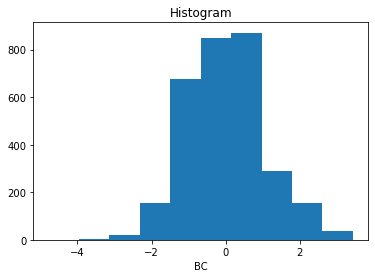

/Users/diego/miniconda3/envs/b36/lib/python3.6/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


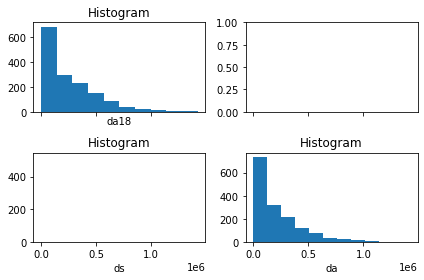

/Users/diego/miniconda3/envs/b36/lib/python3.6/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/Users/diego/miniconda3/envs/b36/lib/python3.6/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


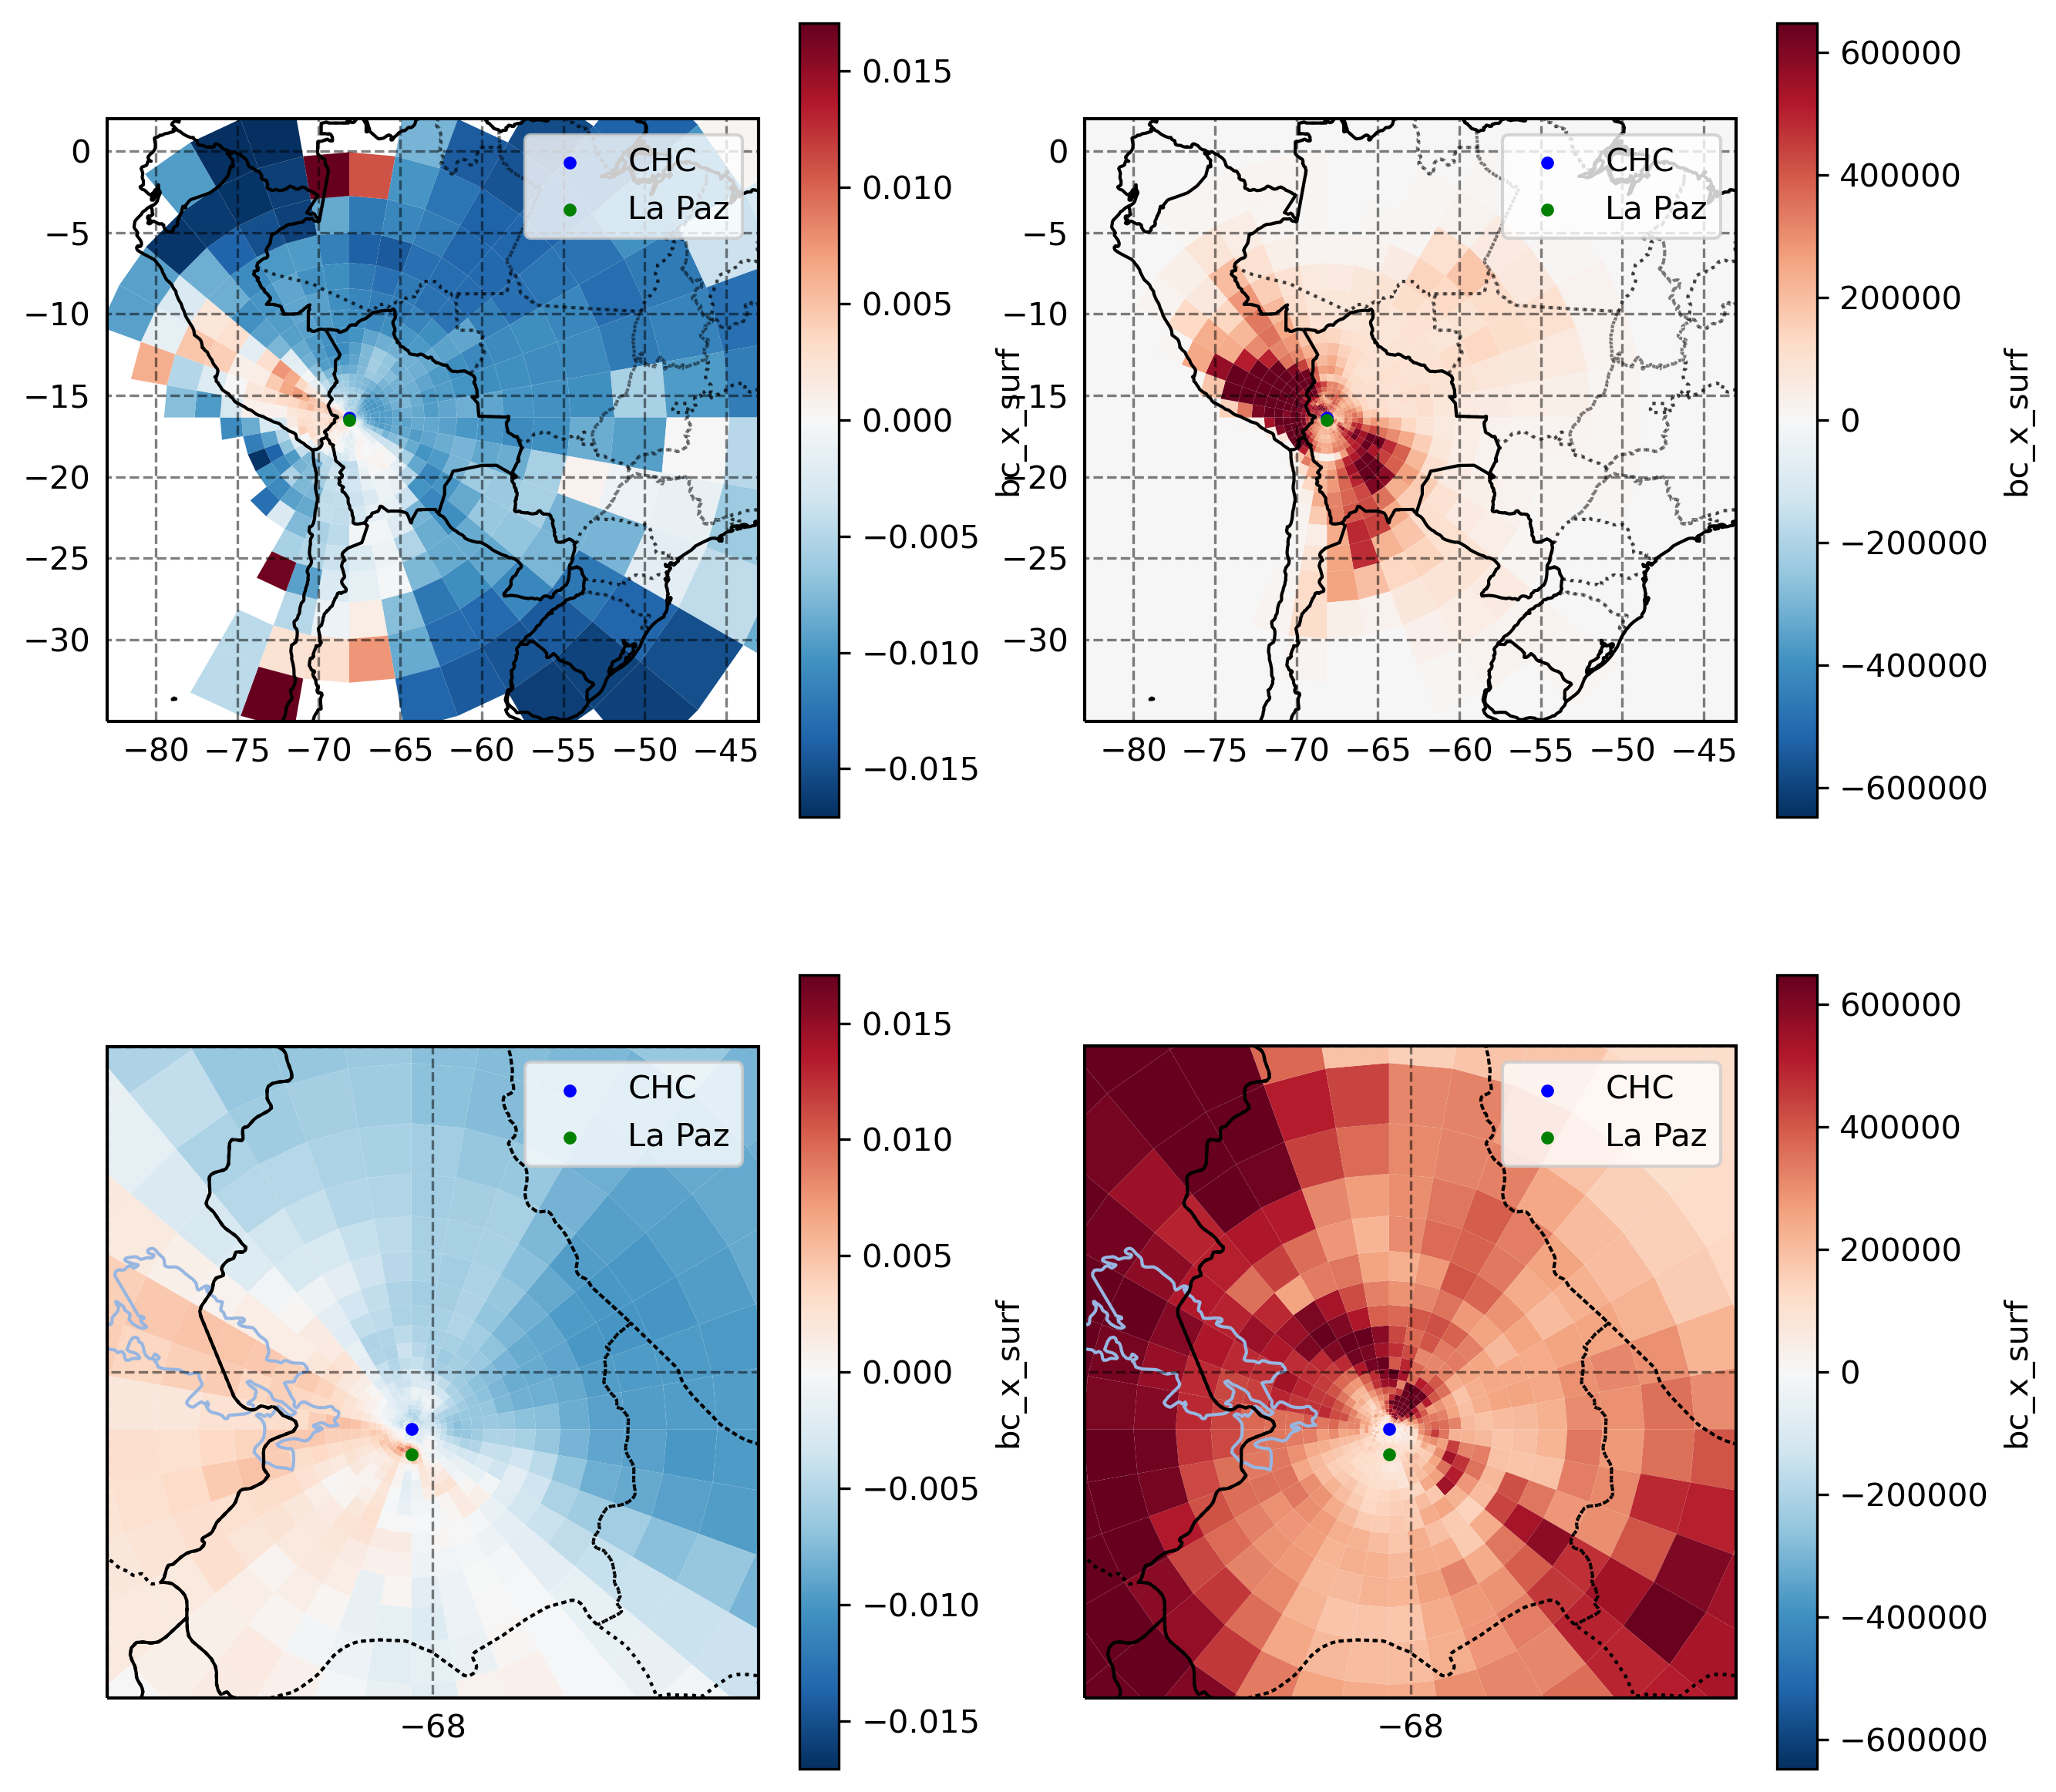

1


In [2]:
def main():
    # %%
    # %%
    iso_ts = fa.open_iso_ts()
    iso_ts = iso_ts.resample('1H').mean()
    clus_ts = lfc.get_clust_ts()
    # %%
    var = 'C4_C5_compounds'
    var = 'BC'
    # var = 'C6_C8_compounds'
    # var ='C9_C13_compounds'
    var_na = iso_ts[var].dropna()
    var_na = var_na.resample('H').mean()
    var_na.plot()
    plt.tight_layout()
    plt.show()
    # %%
    vm = var_na.groupby(var_na.index.hour).median()
    vm.plot()
    plt.show()
    # %%
    v3 = var_na[(var_na.index.hour==15)|(var_na.index.hour==19)]
    d3 = pd.DataFrame(v3)
    j:pd.DataFrame = d3.join(clus_ts)
    f, ax = plt.subplots()
    ax:plt.Axes
    ax.scatter(np.log(j[var]),j['07_SR'])
    plt.show()

    # %%
    # corr = j.corr(method='spearman')
    j_=j.copy()
    j_[var]=np.log(j_[var])
    corr = j_.corr(method='spearman')
    corr = corr.sort_values(var,ascending=False)
    corr = corr.T.sort_values(var,ascending=True)
    f, ax = plt.subplots(figsize=(10,10))
    ax:plt.Axes
    sns.heatmap(corr*100,cmap='RdBu_r',center=0,annot=True,ax=ax,fmt='.0f',square=True,
                vmin=-100,vmax=100)
    plt.show()
    # %%
    # d18 = fa.open_temp_ds_clustered_18(add_names=True)
    # %%
    d18=fa.open_temp_ds('merged_ds.nc')
    # %%
    da18 = d18[{co.ZT:slice(0,3)}][co.CONC]
    da18 = da18.sum(co.ZT)
    # %%
    bc = var_na.to_xarray()
    # %%

    bc.plot.hist()
    plt.show()
    # %%

    bc_log = np.log(bc + 1)
    (bc_log-bc_log.mean()).plot.hist()

    plt.show()
    # %%
    bc = bc.loc[{co.RL: slice('2017', '2019-02')}]

    da_bc = da18 * (bc_log-bc_log.mean())
    da = da18*xr.ones_like(bc)
    da_bc = da18 * (bc/bc.std())
    # db = db/db1
    db=da_bc

    surf = 'bc_x_surf'
    ds = (db.sum(co.RL)/db.mean()-da.sum(co.RL)/da.mean())/da.sum(co.RL)
    dss = da.sum(co.RL)
    dss.name = surf
    ds.name = surf
    ds:xr.Dataset = ds.to_dataset()
    ds = ds.assign_attrs({'long_name':surf})
    f, ax = plt.subplots(2,2,sharex=True,sharey=False)
    ds[surf].plot.hist(ax=ax[1,0])
    ax[1,0].set_xlabel('ds')
    da.sum(co.RL).plot.hist(ax=ax[1,1])
    ax[1,1].set_xlabel('da')
    da18.sum(co.RL).plot.hist(ax=ax[0,0])
    ax[0,0].set_xlabel('da18')
    plt.tight_layout()
    plt.show()


    f,axs = plt.subplots(2,2,subplot_kw=dict(projection=crt.crs.PlateCarree()),
                         figsize=(10,10),dpi=300
                         )
    axB = fa.get_ax_bolivia(ax= axs[0,0])
    axB1 = fa.get_ax_bolivia(ax=axs[0,1])
    axL = fa.get_ax_lapaz(ax=axs[1,0])
    axL1 = fa.get_ax_lapaz(ax=axs[1,1])
    for ax,d in  zip([axB,axL,axB1,axL1],[ds,ds,dss,dss]):

        fa.logpolar_plot(d,name=surf,ax=ax,
                         # quantile=False,
                         # perm=-3e5,perM=3e5,
                     cmap=plt.get_cmap('RdBu_r'),colorbar=True,
                    drop_zeros=False,centered_color=True,

                     )
    plt.show()
    f:plt.Figure
    f.savefig('/tmp/pdf.pdf')
    # %%
if __name__ == '__main__':
    main()
    # %%
print(1)
    # %%
    # %%